In [1]:
import os
import random
import string
from functools import cache

import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from numpy.random import default_rng


- Consider one day to code up random generators like Uniform Distribution from scratch:
- https://github.com/neerajkumarvaid/Data-Science-From-Scratch-Python/blob/master/probability.py
- https://towardsdatascience.com/how-to-generate-random-variables-from-scratch-no-library-used-4b71eb3c8dc7

In [2]:
def seed_all(seed: int = 1992) -> None:
    """Seed all random number generators."""
    print(f"Using Seed Number {seed}")
    
    os.environ["PYTHONHASHSEED"] = str(seed) # set PYTHONHASHSEED env var at fixed value
    np.random.seed(seed)  # for numpy pseudo-random generator
    random.seed(seed) #  set fixed value for python built-in pseudo-random generator

seed_all(1992)

Using Seed Number 1992


## Chapter 1

### Question 6

In [3]:
def f(x, y):
    return np.divide(1, np.multiply(2 * np.sqrt(3), np.pi)) * np.exp(
        np.multiply(
            np.divide(-1, 6),
            (x ** 2 - 2 * x * y - 2 * x + 4 * y ** 2 + 2 * y + 1),
        )
    )

Create meshgrids such that we enumerate cases of the range $[-3, 3] \times [-3, 3]$ for the values that $X$ and $Y$ can take on. Correspondingly, set $Z = f(X, Y)$ such that we have constant values for the set of values we got from the meshgrid.

As an example:

- When $X = -3, Y = 3$, we have $Z = f(X, Y) = 2.8986519194402697e-07$. This is one contour line in the 2d space, but why it looks like a curvature (circle)? This suggests that when keeping $Z$ to be the constant of $2.8986519194402697e-07$, there are many different set of $(X, Y)$ that gives this value!

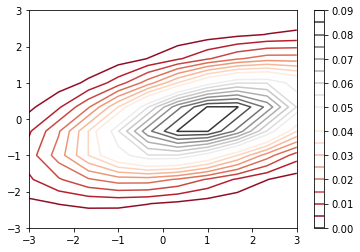

In [4]:
X = np.linspace(-3, 3, 10)
Y = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

### Question 9

In [5]:
@cache
def calc_vowel_consonant_prob(num_simulations: int, *args, **kwargs) -> float:
    """A collection of 26 English letters, a-z, is mixed in a jar. Two letters are drawn at random,
    one after the other without replacement. What is the probability of drawing a vowel (a,e,i,o,u)
    and a consonant in either order?

    Args:
        num_simulations (_type_): Number of simulations to run.

    Returns:
        float: The probability of drawing a vowel and a consonant in either order.
    """

    count = 0
    rng = default_rng()
    for sim_num in range(num_simulations):
       
        sample_2_letters_without_replacement = rng.choice(*args, **kwargs)
      
        chosen_letters = np.asarray(all_letters)[sample_2_letters_without_replacement]
        
        if not (
            set(chosen_letters).issubset(vowels) or set(chosen_letters).issubset(consonants)
        ):
            count += 1

    return count / num_simulations

In [6]:
all_letters = list(string.ascii_lowercase)
vowels = ["a", "e", "i", "o", "u"]
consonants = list(set(all_letters) - set(vowels))

num_simulations = 1000000
calc_vowel_consonant_prob(num_simulations, a = 26, size = 2, replace=False)

0.32302

- `sample_2_letters_without_replacement = rng.choice(a = 26, size = 2, replace=False)`: This is equivalent to `random.sample(range(26), 2)` which if we set the parameters correctly, means we will sample index 0 to 25 twice, without replacement. For example, the sampled index is in a form of a array of size 2: `[1, 4]` which corresponds to the letters `[b, e]`.
- `chosen_letters = np.asarray(all_letters)[sample_2_letters_without_replacement]`: This is just subsetting the index from the `all_letters`. Since `all_letters` is a list which enumerates the alphabets in order, it suffices for us to just subset the array directly to get the chosen letters.
- `if not (set(chosen_letters).issubset(vowels) or set(chosen_letters).issubset(consonant)): count += 1`: If our `chosen_letters` is neither a subset of the vowels or the consonant, then this means that it fulfills our condition, (i.e. one consonant and one vowel, we don't care order since the question said either order). If condition fulfilled, `count` adds 1.
- Lastly, calculate the probability by dividing the `count` by the `num_simulations` to get the frequency (i.e the probability). Indeed with enough simulations, the probability converges to the theoretical answer of $0.3230...$. 